<a href="https://colab.research.google.com/github/jgoncsilva/Classes_IronHack/blob/master/matplotlib_seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sb

import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving EU-Superstore.csv to EU-Superstore.csv


In [ ]:
data = pd.read_excel("Sample - EU Superstore.xlsx")

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,ES-2017-1311038,2017-02-07,2017-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60
1,2,ES-2017-1311038,2017-02-07,2017-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00
2,3,ES-2017-1311038,2017-02-07,2017-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11
3,4,ES-2017-1311038,2017-02-07,2017-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20
4,5,ES-2017-1311038,2017-02-07,2017-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71


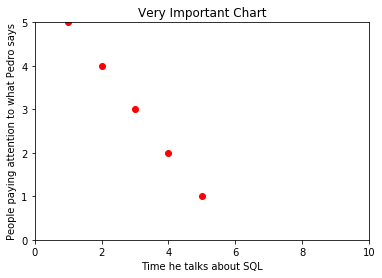

In [ ]:


# we can make it prettier and with useful information

plt.plot([1,2,3,4,5],[5,4,3,2,1],'ro')
plt.ylabel("People paying attention to what Pedro says")
plt.xlabel("Time he talks about SQL")
plt.title('Very Important Chart')
plt.axis([0,10,0,5])
plt.show()
plt.savefig('outputfile.png')

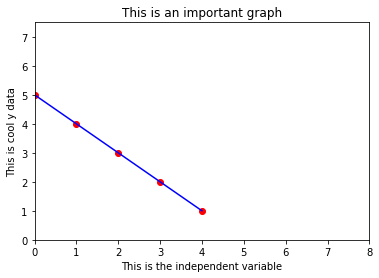

In [ ]:
plt.plot([0,1,2,3,4],[5,4,3,2,1],'ro')

plt.plot([0,1,2,3,4],[5,4,3,2,1],'b-')

plt.ylabel("This is cool y data")
plt.xlabel("This is the independent variable")
plt.title('This is an important graph')
#static axis size definition
plt.axis([0,10,0,5])

#dynamic axis size definition
plt.axis([0,2*max([0,1,2,3,4]),0,1.5*max(*[5,4,3,2,1])])


plt.show()

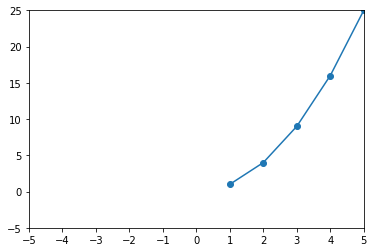

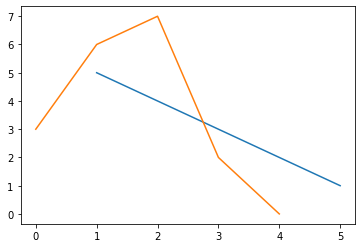

In [ ]:
# The most basic of charts
import numpy as np

x = np.array([1,2,3,4,5])
y = np.square(x)
my_xticks = ['a', 'b', 'c', 'd','e']
#plt.xticks(x, my_xticks)
plt.xticks(np.arange(-7, 6, 1))
#plt.yticks(np.arange(y.min(), y.max(), 0.005))

plt.xlim(-5, 5)
plt.ylim(-5, 25)

plt.plot(x,y,'o-')
plt.show()

plt.plot([1,2,3,4,5],[5,4,3,2,1],[3,6,7,2,0])
plt.show()

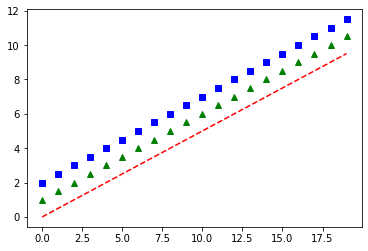

In [ ]:
# you can also create mathematical functions based on an array

import numpy as np

x = np.arange(0,10,0.5)

plt.plot(x,'r--',x+1, 'g^',x+2,'bs')

plt.show()

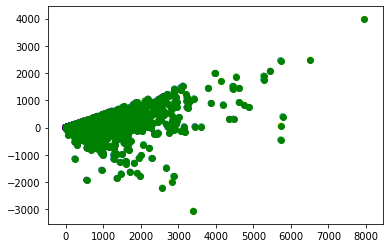

In [ ]:
# c = colour
# s = size
plt.scatter(data['Sales'],data['Profit'],c = data['Quantity'])

plt.scatter(data['Sales'],data['Profit'],c = 'green')
plt.show()

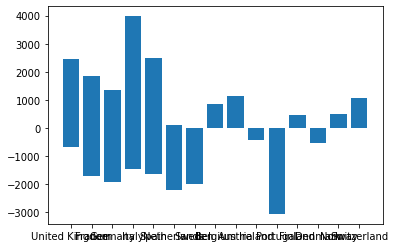

In [ ]:
#f = plt.plot(figsize = (20,20))
plt.bar(data['Country'],data['Profit'])
plt.show()
#what does he do here?

In [ ]:
# to get the bar chart, we need to make sure that the content is aggregated to the right level
countries = data.groupby('Country')['Profit'].sum()

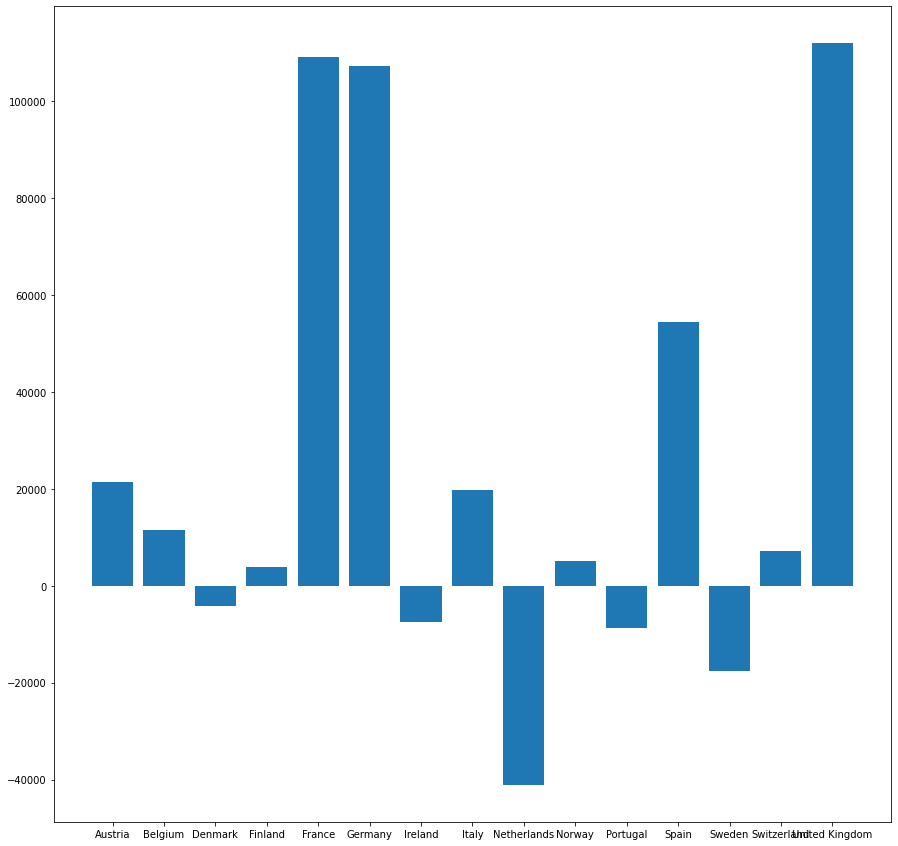

In [ ]:
f = plt.figure(figsize = (15,15))
plt.bar(countries.index,countries.values)
plt.show()

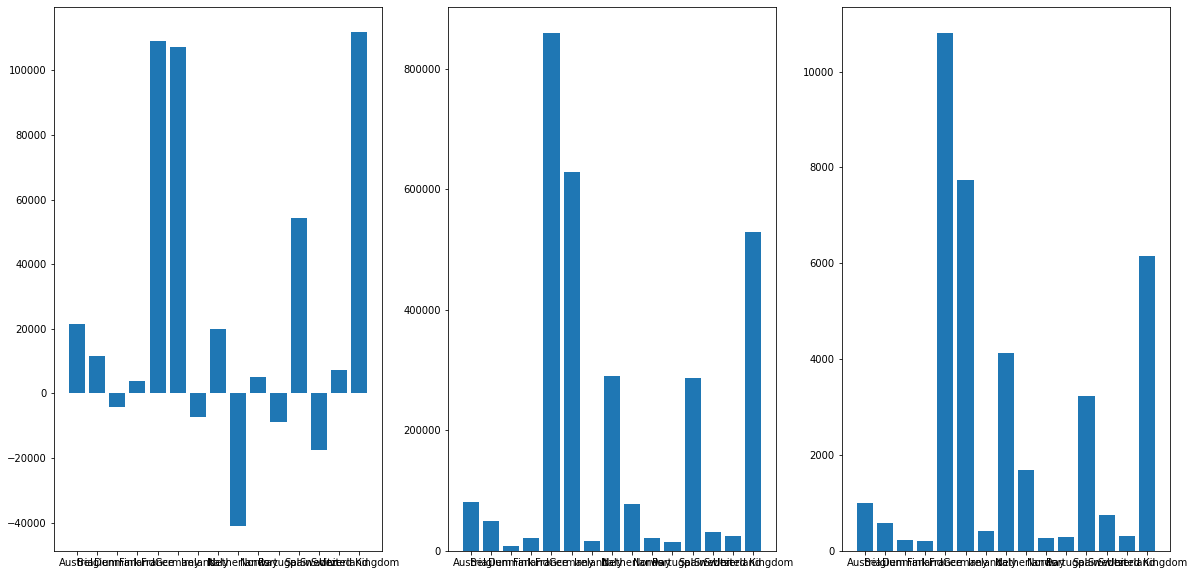

In [ ]:
# subplots 

f , (a1,a2,a3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,10))

countriesp = data.groupby('Country')['Profit'].sum()
countriess = data.groupby('Country')['Sales'].sum()
countriesq = data.groupby('Country')['Quantity'].sum()

a1.bar(countriesp.index, countriesp.values)
a2.bar(countriess.index, countriess.values)
a3.bar(countriesq.index, countriesq.values)

plt.show()

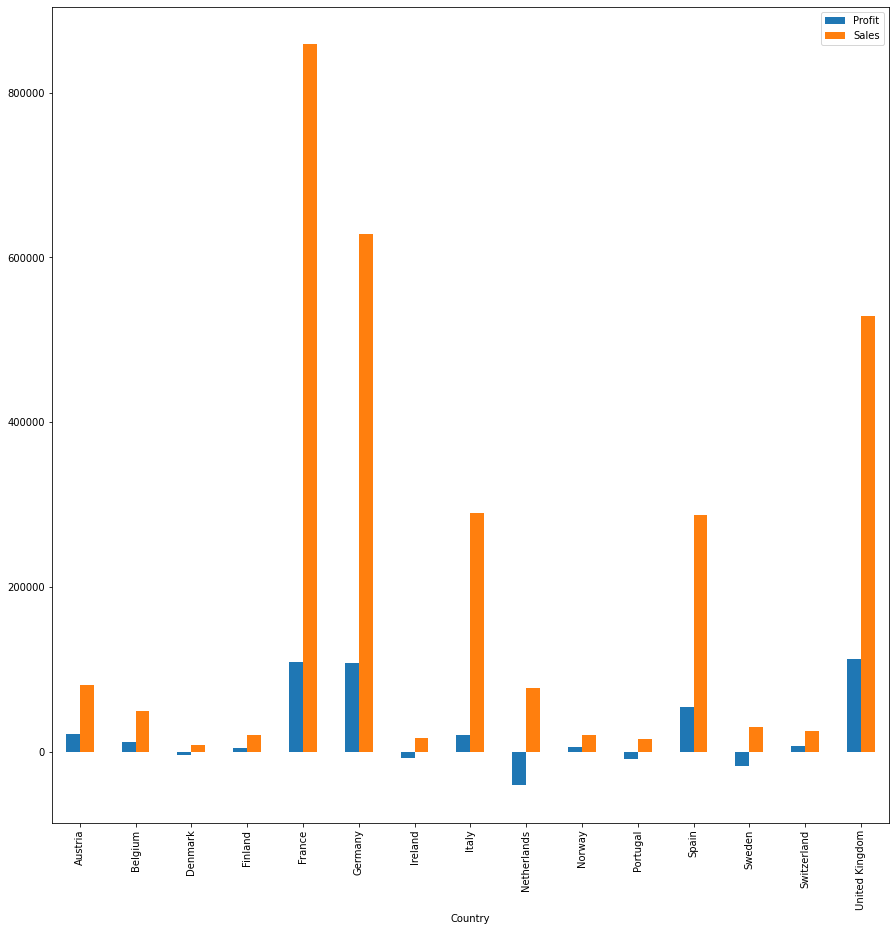

In [ ]:
#because somebody is bound to ask -> time to plot directly from pandas

countriesp = data.groupby('Country')[['Profit','Sales']].sum()

#f = plt.figure(figsize = (15,15))
countriesp.plot(kind = 'bar', figsize = (15,15))

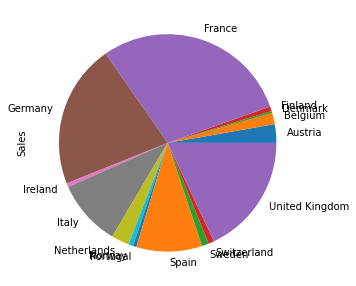

In [ ]:
# number 1 rule of pie charts: DONT USE PIE CHARTS

countriesp = data.groupby('Country')['Sales'].sum()

plot = countriesp.plot.pie(y='Sales', figsize=(5, 5))

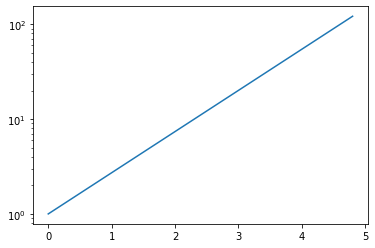

In [ ]:
x = np.arange(0,5,0.2)

plt.plot(x,np.exp(x))
plt.yscale('log')

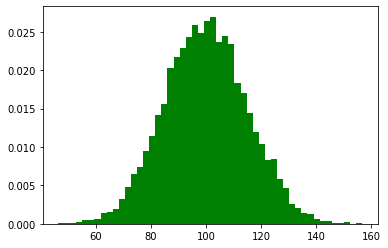

In [ ]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g')

In [ ]:
# Explain boxplots
# lets see the documentation for performing a box plot in matplot lib

#https://matplotlib.org/3.1.3/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py


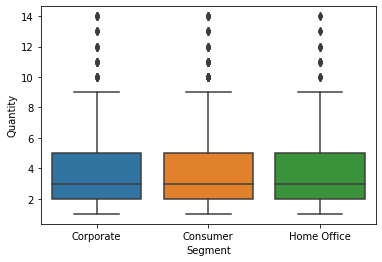

In [ ]:
sb.boxplot(x = 'Segment', y = 'Quantity', data = data)

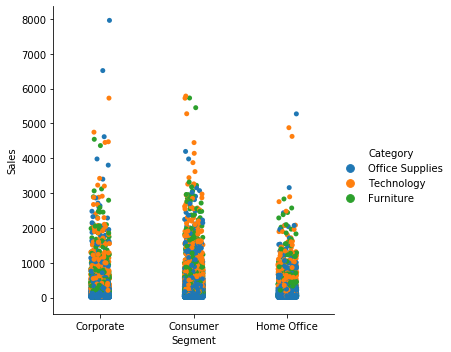

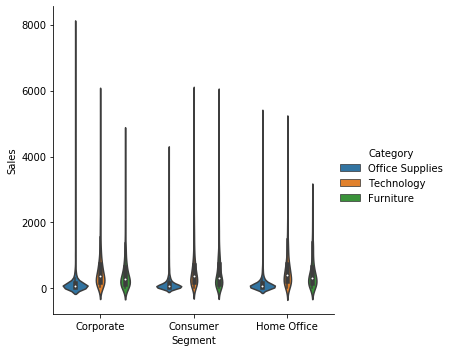

In [ ]:
# https://seaborn.pydata.org/introduction.html

sb.catplot(x = 'Segment', y = 'Sales',hue = 'Category', data = data)

sb.catplot(x = 'Segment', y = 'Sales',hue = 'Category', data = data, kind = 'violin')


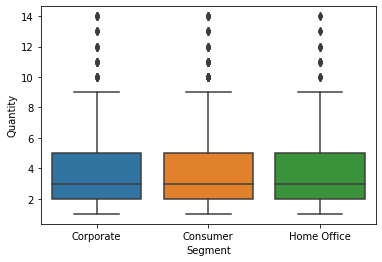

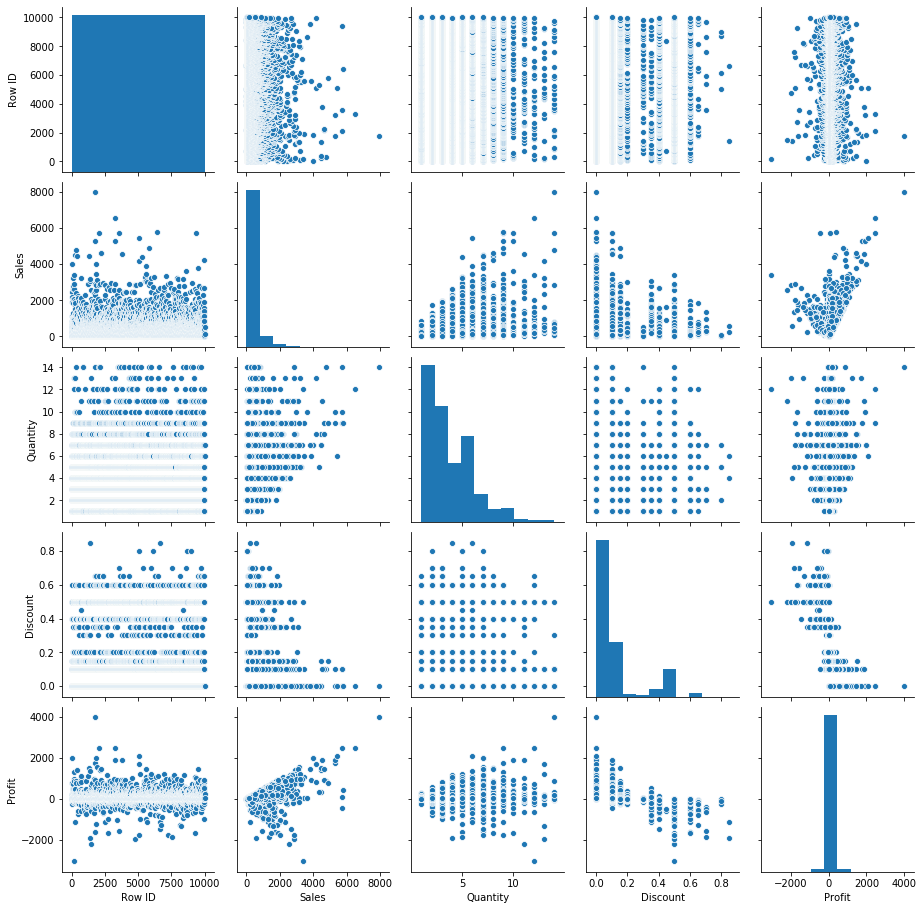

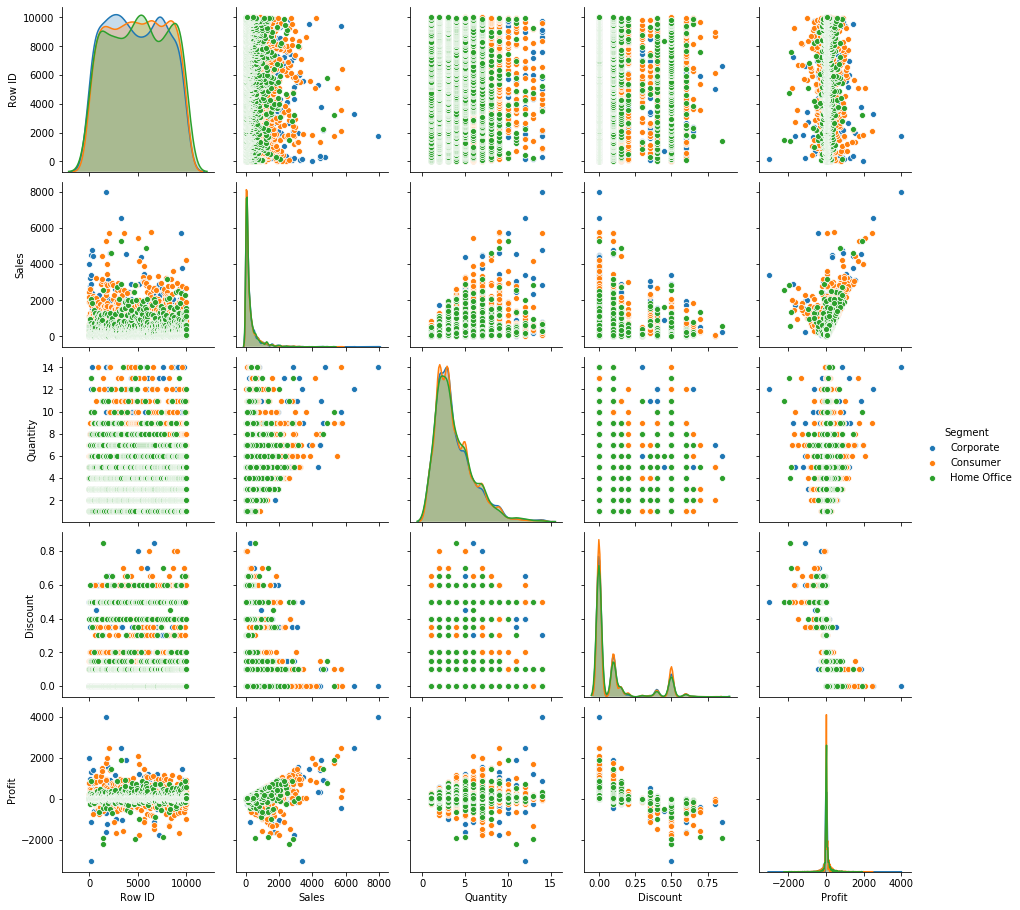

In [ ]:
# finally, we couldnt end without the atomic bomb of plotting

sb.pairplot(data)
sb.pairplot(data, hue = 'Segment')

In [ ]:
data

NameError: ignored

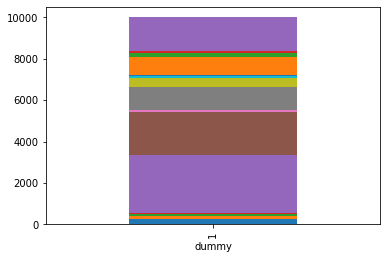

In [ ]:
data.assign(dummy = 1).groupby(['dummy','Country']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

# https://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot

# do a correlation